### Libraries

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets 
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (15, 5)
plt.style.use("fivethirtyeight")

### Reading Data

In [3]:
data = pd.read_csv("drug.csv")

print(f"The shape of the Dataset: {data.shape}")

The shape of the Dataset: (161297, 7)


In [4]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [18]:
print(f"Number of unique Drug name in the dataset: {data.drugName.nunique()}")
print(f"Number of unique Medical Conditions present in the dataset: {data.condition.nunique()}")
print("\n")
print(f"Starting Date of review: {data.date.min()}")
print(f"Ending Date of review: {data.date.max()}")

Number of unique Drug name in the dataset: 3436
Number of unique Medical Conditions present in the dataset: 884


Starting Date of review: 1-Apr-08
Ending Date of review: 9-Sep-17


### Summarizing Dataset

In [87]:
# Summarizing the numeric value columns using describe function
data[['rating', 'usefulCount']].describe()


,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [85]:
print("Analysis of Useful Drugs:")
# Checking Usefull Drugs Useful Count Greater than 1000
print(f"\nNumber of Drugs with Useful Count greater than 1000: {data[data['usefulCount'] >= 1000].count()[0]}")

# Checking the Average Rating of Drugs with 1000+ Useful Counts
print(f"\nAverage Rating of Drugs with 1000+ Useful Count: {data[data['usefulCount']>=1000]['rating'].mean()}")

# Name and Condition of the Useful Drugs
print(f"\nName and Condition of Useful Drugs: \n {data[data['usefulCount']>=1000][['drugName', 'condition']].reset_index(drop=True)}")

print("\n----------------------------------------\n")

# Checking the drugs with 0 Useful Count in detail
print("\nAnalysis of Useless Drugs:")
print(f"\nNumber of Drugs with no Useful Count: {data[data['usefulCount'] == 0].count()[0]}")

# Checking number of drugs with No Useful Count but with Reviews greater than or equal to 8
print(f"\nNumber of Good Drugs with No Useful Count: {data[data['usefulCount'] == 0].count()[0] & data[data['rating'] >= 8].count()[0]}")

# Checking the average rating of drugs with 0 Useful Count
print(f"\nMean rating of the Drugs with No Useful Count: {data[data['usefulCount'] == 0]['rating'].mean():.2f}")


Analysis of Useful Drugs:

Number of Drugs with Useful Count greater than 1000: 4

Average Rating of Drugs with 1000+ Useful Count: 10.0

Name and Condition of Useful Drugs: 
          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression

----------------------------------------


Analysis of Useless Drugs:

Number of Drugs with no Useful Count: 6318

Number of Good Drugs with No Useful Count: 6274

Mean rating of the Drugs with No Useful Count: 5.80


In [88]:
# Summarizing Categorial Data
data[["drugName", "condition", "review"]].describe(include="object")

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [92]:
# Checking for Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [94]:
# Dropping all records where condition is missing
data = data.dropna()

# Checking for missing values again
data.isnull().sum().sum()

0

### Hidden Patterns in the Data

/var/folders/22/4cywtbxx6gxc5nrkvcxfmqbm0000gn/T/ipykernel_95102/1803926879.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])
/var/folders/22/4cywtbxx6gxc5nrkvcxfmqbm0000gn/T/ipykernel_95102/1803926879.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usefulCount'])


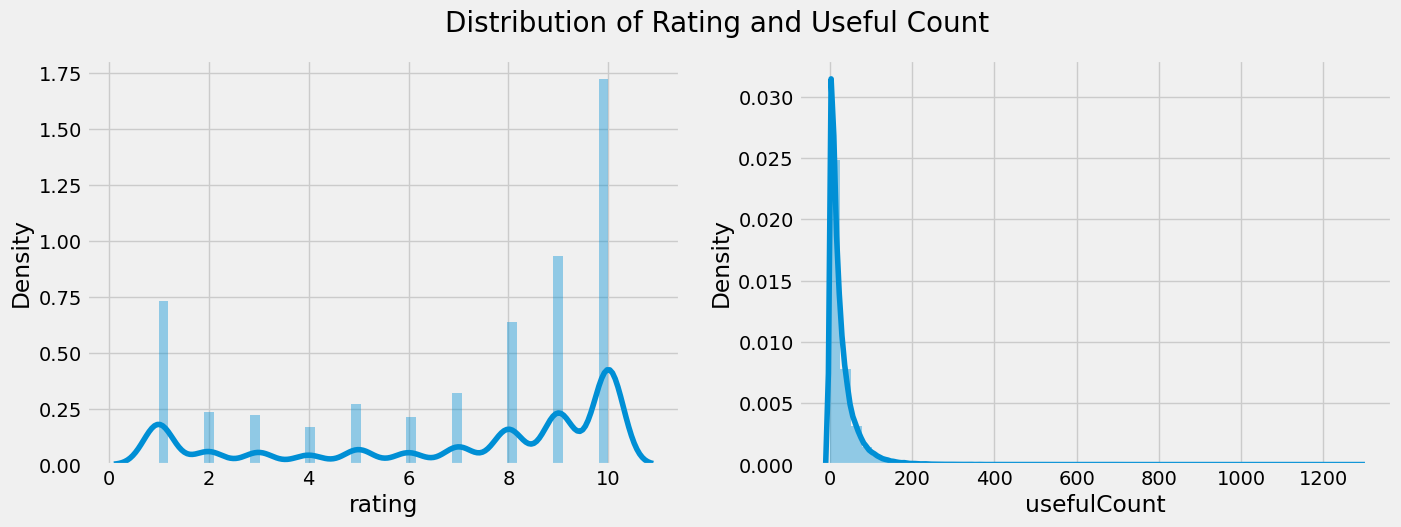

In [125]:
# Checking the Distribution of Rating and Useful Count
plt.rcParams["figure.figsize"] = (15, 5)

plt.subplot(1, 2, 1)
sns.distplot(data['rating'])

plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])

plt.suptitle("Distribution of Rating and Useful Count\n", fontsize = 20)
plt.show()

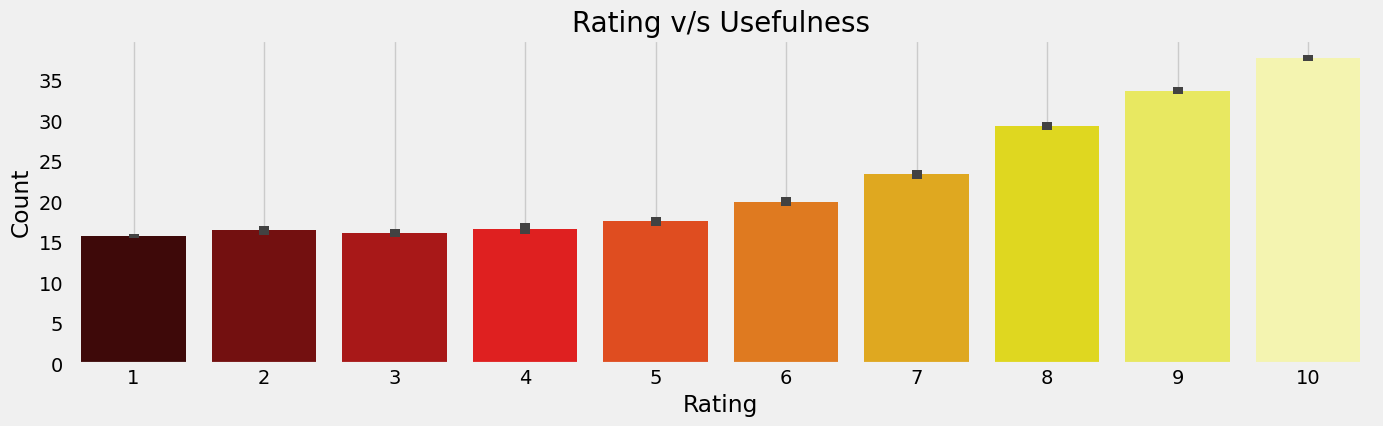

In [138]:
# Checking the Impact of Ratings on Usefulness
plt.rcParams["figure.figsize"] = (15, 4)

sns.barplot(x='rating', y='usefulCount', data=data, palette='hot')
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating v/s Usefulness", fontsize = 20)
plt.show()

In [139]:
# Does the length of review has any impact on the rating of the drug

# New column that contains the length of the each review
data['len'] = data['review'].apply(len)

In [140]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719


In [143]:
# Checking the impact of length of reviews on ratings
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [151]:
# Checking the longest review in the dataset
print(f"Longest Review: {data['len'].max()}")
data['review'][data['len'] == data['len'].max()].iloc[0]

Longest Review: 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

### Cleaning The Reviews

In [164]:
# Upon checking the output of the previous cell we understand that there are a lot of unnecessary things

# Staring with Punctuation removal
def remove_punctuations(text):
    new_text = ''.join([char for char in text if char not in string.punctuation])
    return new_text

data['review'] = data['review'].apply(remove_punctuations)

In [165]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len
0,206461,Valsartan,Left Ventricular Dysfunction,It has no side effect I take it in combination...,9,20-May-12,27,79
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,27-Apr-10,192,741
2,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5,14-Dec-09,17,755
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,3-Nov-15,10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9,27-Nov-16,37,719


In [186]:
# Removing Stop Words

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
stop_words.append("i'm")

def remove_stopwords(text):
    text = word_tokenize(text)
    new_text = ' '.join([word.lower() for word in text if word.lower() not in stop_words])
    return new_text

data['review'] = data['review'].apply(remove_stopwords)

In [187]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic 5 mg fis...,9,20-May-12,27,79
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,741
2,92703,Lybrel,Birth Control,used take another oral contraceptive 21 pill c...,5,14-Dec-09,17,755
3,138000,Ortho Evra,Birth Control,first time using form birth control i039m glad...,8,3-Nov-15,10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,719


In [210]:
# Removing Numbers
import re

def remove_mumbers(text):
    new_text = ''.join([i for i in text if not re.search('\d', i)])
    return new_text

data['review'] = data['review'].apply(remove_mumbers)

In [214]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish...,9,20-May-12,27,79
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,741
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cyc...,5,14-Dec-09,17,755
3,138000,Ortho Evra,Birth Control,first time using form birth control im glad we...,8,3-Nov-15,10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,719


### Sentiment Analisys of the Reviews

In [216]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [217]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abhijeetb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [218]:
# Getting the Sentiments of the Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))


In [222]:
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

In [223]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish...,9,20-May-12,27,79,0.0000
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192,741,0.9068
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cyc...,5,14-Dec-09,17,755,0.7506
3,138000,Ortho Evra,Birth Control,first time using form birth control im glad we...,8,3-Nov-15,10,448,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,719,0.9403


In [227]:
# Checking the Impact of Sentiments on Reviews
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9930  0.001320  0.9898
2        -0.9929  0.001686  0.9929
3        -0.9970  0.000924  0.9865
4        -0.9913  0.003433  0.9867
5        -0.9920  0.014600  0.9854
6        -0.9913  0.001360  0.9936
7        -0.9928 -0.003802  0.9911
8        -0.9951  0.002744  0.9888
9        -0.9961  0.004230  0.9947
10       -0.9982  0.001693  0.9947

In [228]:
# Upon ooking at the output of the previous cell we can say that Sentiment are not related to the Ratings, so we drop the sentiment column
# along with the uniqueID, date, review and len
data = data.drop(['uniqueID', 'date', 'review', 'len', 'sentiment'], axis=1)

data.columns


Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [230]:
# CAlculating Effective Rating
min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating / (max_rating - 1)
    rating *= 5
    rating = int(round(rating, 0))

    if int(rating) == 0 or int(rating) == 1 or int(rating) == 2:
        return 0
    else:
        return 1
    
data['effec_scores'] = data['rating'].apply(scale_rating)

In [232]:
# Calculate the Usefulness Score

data['usefulness'] = data['rating'] * data['usefulCount'] * data['effec_scores']

In [242]:
# Checking the top 10 Useful Drugs with their respective consitions
data[['drugName', 'condition', 'usefulness']][data['usefulness'] > data['usefulness'].mean()].sort_values(by= 'usefulness', ascending=False).head(10).reset_index(drop=True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


### Analyzing the Medical Condition

In [253]:
# Calculate the number of useful and useless drugs in each condition

@interact
def check(condition = list(data['condition'].value_counts().index)):
          return data[data['condition'] == condition]['effec_scores'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

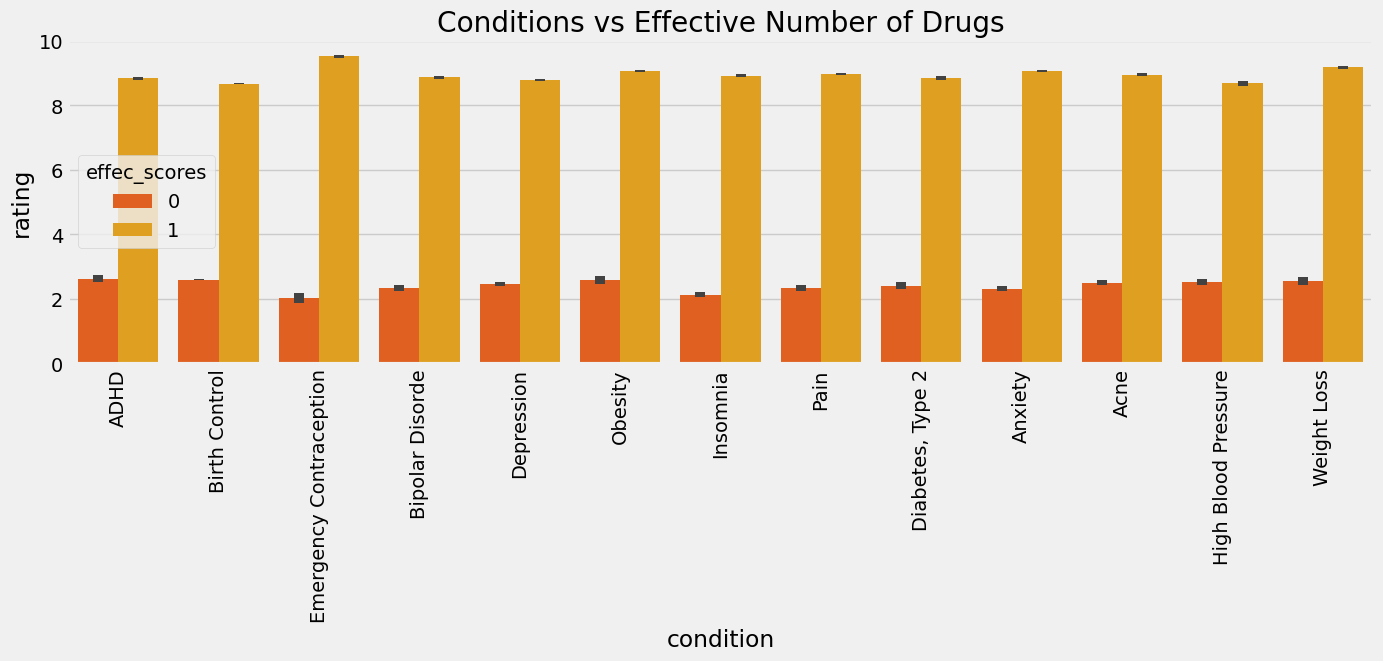

In [262]:
# Visualizing using a Graph

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')

conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue=data['effec_scores'], palette= 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.show()

In [264]:
# Check the Most Common Conditions
print(f"Number of Unique Conditions : {data['condition'].nunique()}")
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64

In [265]:
# Check Drugs, which have the heightes useful count
data[['drugName', 'usefulCount']][data['usefulCount'] > data['usefulCount'].mean()].sort_values(by = 'usefulCount', ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


### Finding Most Useful and Useless Drugs for each Condition

In [266]:
# Removing all the duplicate records from the dataset
data = data.drop_duplicates()

In [270]:
# Finding the Highest and Lowest rated drug for each condition

@interact
def high_low_rating(condition = list(data['condition'].value_counts().index)):
    print("\n 5 Drugs with Highest Rating: ")
    print(data[data['condition'] == condition][['drugName', 'usefulness']].sort_values(by= 'usefulness', ascending = False).head().reset_index(drop = True))

    print("\n 5 Drugs with Lowest Rating: ")
    print(data[data['condition'] == condition][['drugName', 'usefulness']].sort_values(by= 'usefulness', ascending = True).head().reset_index(drop = True))



interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…